In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelFile
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [30]:
# Der Boston Housing-Datensatz : die Wohnverhältnisse in 506 Gebieten von Boston 
# 13 stetige und eine binäre (Dummy-)Variable.
# Die Dummy-Variable ( CHAS): entsprechende Gebiet direkt am Charles River liegt.
# Der Median der Hauspreise pro Gebiet ist die abhängige Variable in der ursprünglichen Analyse.
# MMEDV: die Mittelwerte des Houspreis in $1000'S
# Crim: Kriminalitätsrate der Stadt, ZN: Anteil der Wohnungsstücke für Parzellen über 25000m²
# Indus: Anteil der nicht Einzelhandelsgeschäfte pr Stadt,  CHAS:
# NOX: Stickoxid konventration, RM: durschnittliche Anzahl der Zimmer pro Wohnung
# AGE: Anteil der Eigenheime die vor 1940 gebaut wurden,  DIS: Entfernung zu Bostoner Arbeitsämtern
# RAD: Index der Zugänglichkeit zu Radialstraßen, TAX: 
# PTRATIO: Schüler-Lehrer Verhältnis nach Stadt...

In [2]:
h=pd.read_csv("boston_house_prices.csv")
df=pd.DataFrame(h)
df.head()

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [3]:
df=df.rename(columns=df.iloc[0])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [4]:
df=df.drop(df.index[0])
df=df.reset_index(drop=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
X=df.iloc[:,0:13]
y=df.iloc[:,13]

In [7]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.10) 

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit_transform(X_train) 

# Anwendung der Transformationen auf die Daten
X_train_std = s.fit_transform(X_train)
X_test_std = s.fit_transform(X_test)

In [37]:
from sklearn.svm import SVR
svr= SVR() 
svr.fit (X_train_std, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

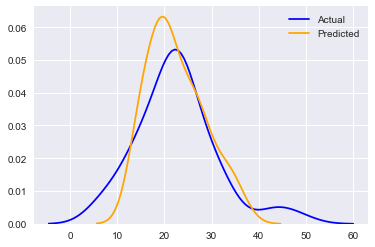

In [38]:
p=svr.predict(X_test_std)
df1=pd.DataFrame({"Actual": np.array(y_test).flatten(), "Predicted":p})
#print(df1)
sns.set()
sns.kdeplot(df1["Actual"], color="b")
sns.kdeplot(df1["Predicted"], color="orange")

In [39]:
score=svr.score(X_test_std, y_test)
score

0.7358522177265647

In [40]:
from sklearn.model_selection import GridSearchCV

parameters ={"kernel":["linear", "poly", "rbf", "sigmoid"],
             "gamma":[0.01, 0.1, 1],
             "C":[1, 10, 100],
             "epsilon":[0.1, 0.2, 0.3]}
GS=GridSearchCV(estimator=SVR() ,
                param_grid=parameters)
GS.fit(X_train_std, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [0.01, 0.1, 1], 'C': [1, 10, 100], 'epsilon': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print(GS.best_params_)

{'C': 100, 'epsilon': 0.3, 'gamma': 0.1, 'kernel': 'rbf'}


In [42]:
print(GS.best_estimator_.score(X_test_std, y_test))

0.8747934447592932


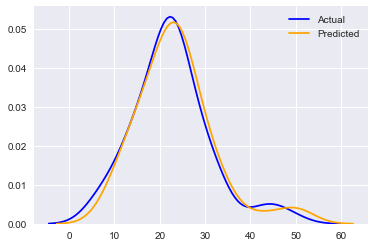

In [45]:
p1=GS.predict(X_test_std)
df2=pd.DataFrame({"Actual": np.array(y_test).flatten(), "Predicted":p1})
sns.kdeplot(df2["Actual"], color="b")
sns.kdeplot(df2["Predicted"], color="orange")

In [46]:
# Mit NuSVR

In [9]:
from sklearn.svm import NuSVR
nusvr= NuSVR()
nusvr.fit (X_train_std, y_train)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

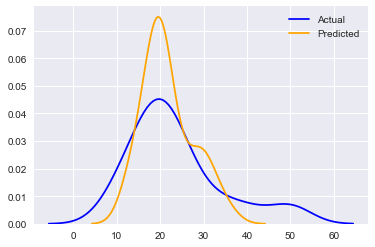

In [10]:
y_predict=nusvr.predict(X_test_std)
df3=pd.DataFrame({"Actual": np.array(y_test).flatten(), "Predicted":y_predict})
#print(df1)
sns.set()
sns.kdeplot(df3["Actual"], color="b")
sns.kdeplot(df3["Predicted"], color="orange")

In [11]:
score=nusvr.score(X_test_std, y_test)
score

0.6206425448834009

In [12]:
from sklearn.model_selection import GridSearchCV

parameters ={"kernel":["linear", "poly", "rbf", "sigmoid"],
             "gamma":[0.01, 0.1, 1],
             "C":[1, 10, 100],
             "nu":[0.1, 0.3, 0.5, 1]}
GS=GridSearchCV(estimator=NuSVR() ,
                param_grid=parameters)
GS.fit(X_train_std, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [0.01, 0.1, 1], 'C': [1, 10, 100], 'nu': [0.1, 0.3, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
print(GS.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.3}


In [14]:
print(GS.best_estimator_.score(X_test_std, y_test))

0.9167290998777352


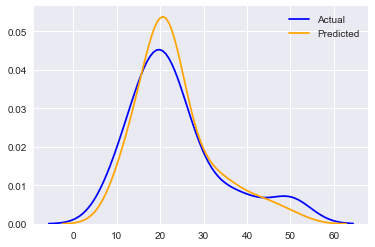

In [15]:
y_predict1=GS.predict(X_test_std)
df4=pd.DataFrame({"Actual": np.array(y_test).flatten(), "Predicted":y_predict1})
sns.kdeplot(df4["Actual"], color="b")
sns.kdeplot(df4["Predicted"], color="orange")